In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.datasets import fashion_mnist

# Charger les données Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [25]:
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
1875/1875 [==============================] - 2s 916us/step - loss: 0.5177 - accuracy: 0.8179
Epoch 2/30
1875/1875 [==============================] - 2s 871us/step - loss: 0.3802 - accuracy: 0.8621
Epoch 3/30
1875/1875 [==============================] - 2s 880us/step - loss: 0.3442 - accuracy: 0.8756
Epoch 4/30
1875/1875 [==============================] - 2s 896us/step - loss: 0.3208 - accuracy: 0.8824
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.8872
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2904 - accuracy: 0.8919
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2801 - accuracy: 0.8952
Epoch 8/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2704 - accuracy: 0.8986
Epoch 9/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2600 - accuracy: 0.9031
Epoch 10/30
1875/1875 [==============================] - 2s 1ms/step - los

In [26]:
# Évaluation des performances du modèle
score = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy:', round(score[1],4))
print('Recall:', round(score[0],4))


Accuracy: 0.8838
Recall: 0.4004


In [4]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 858us/step


Matrice de confusion:


<function matplotlib.pyplot.axis(arg=None, /, *, emit=True, **kwargs)>

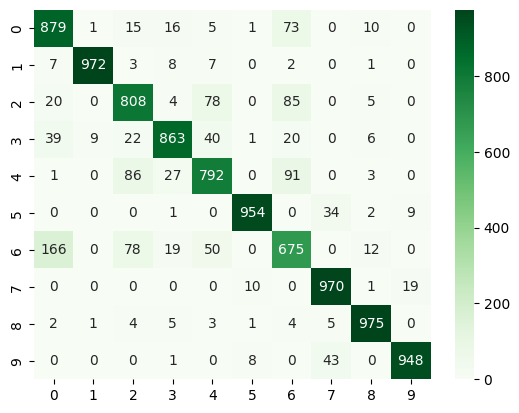

In [5]:
print('Matrice de confusion:')
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes)
sns.heatmap(confusion_matrix, cmap="Greens", annot=True, fmt=".0f")
plt.axis

## Compiler le modèle

#### Meilleur paramèteur utilisant Gridsearch

In [6]:
def create_model(num_layers=2, num_neurons=64):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    for _ in range(num_layers):
        model.add(tf.keras.layers.Dense(num_neurons, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {
    'num_layers': [2, 3, 4, 5],
    'num_neurons': [64, 128, 256],
    'epochs': [20, 30, 40]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid,
                    scoring='accuracy', cv=3)
grid_result = grid.fit(x_train, y_train)


/tmp/ipykernel_109228/1306412088.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


625/625 [==============================] - 1s 1ms/step


In [7]:

print("Best score:", grid_result.best_score_)
print("Best parameters:", grid_result.best_params_)


Best score: 0.8927166666666667
Best parameters: {'epochs': 40, 'num_layers': 3, 'num_neurons': 256}


In [8]:
best_model = grid_result.best_estimator_
# Evaluation des performances du meilleur modèle
score = best_model.score(x_test, y_test)
print("Accuracy:", round(score, 4))

Accuracy: 0.8899


313/313 [==============================] - 0s 989us/step
Confusion Matrix:


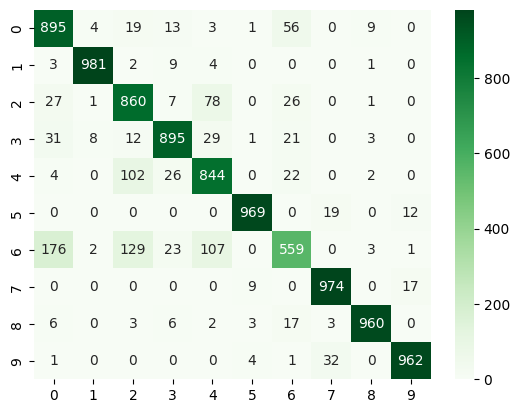

In [9]:
y_pred1 = best_model.predict(x_test)
print("Confusion Matrix:")
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred1)
sns.heatmap(pd.DataFrame(confusion_matrix), cmap="Greens", annot=True, fmt=".0f")
plt.show()


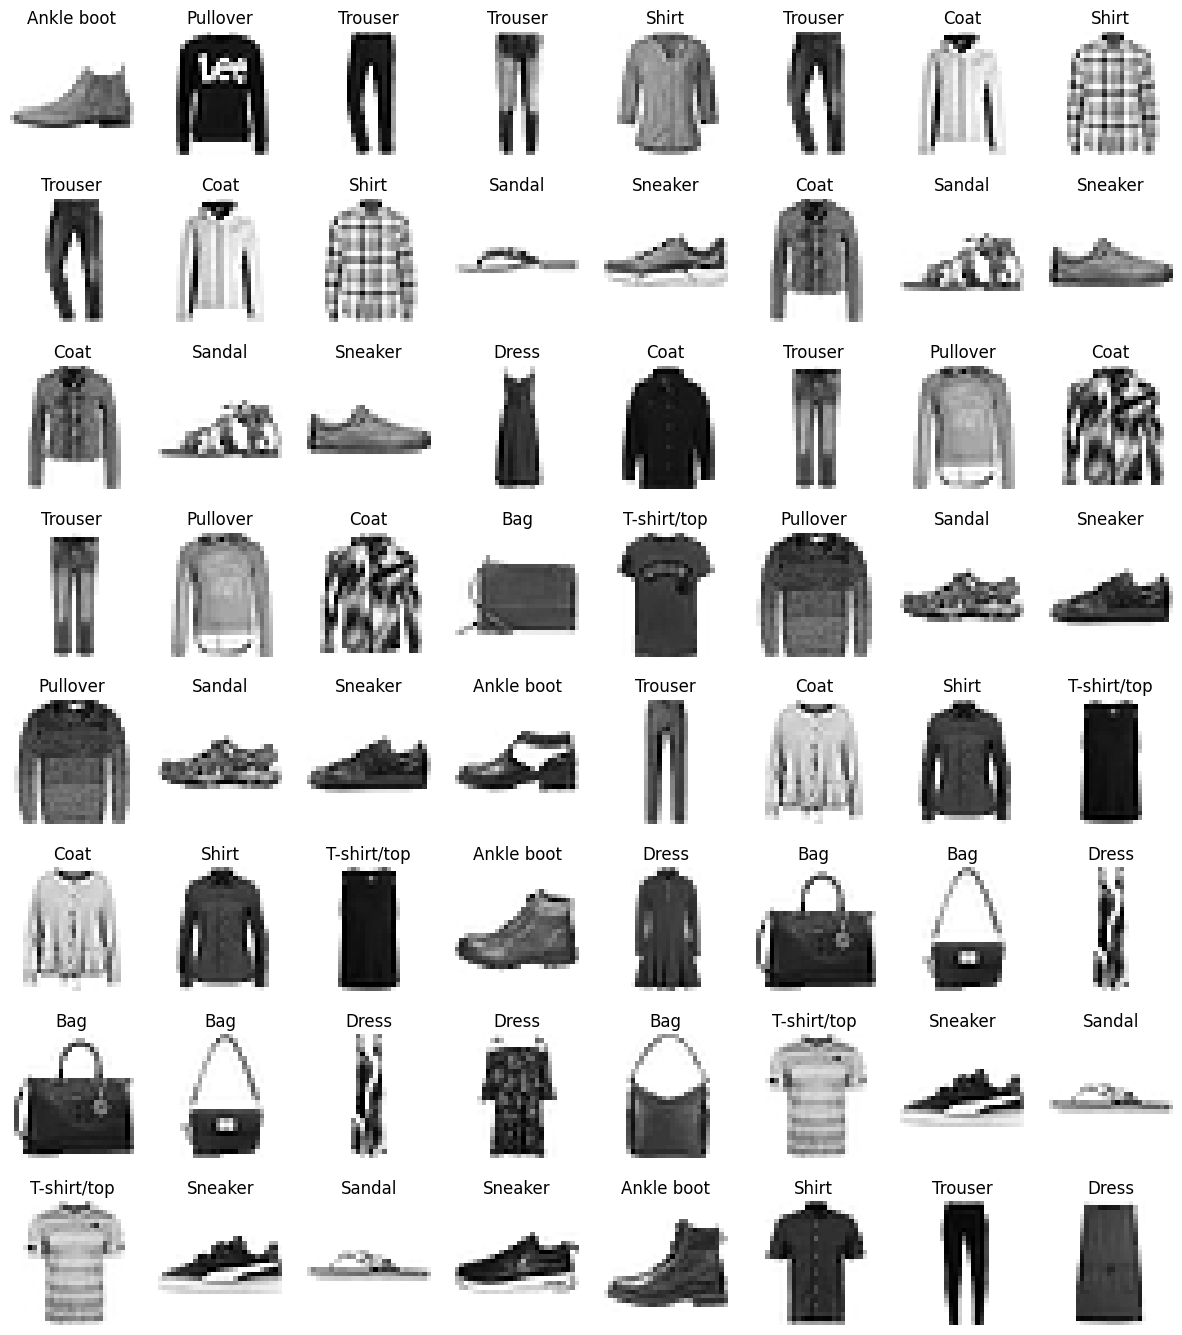

In [18]:

classes = ['T-shirt/top', 'Trouser', 'Pullover',
           'Dress', 'Coat', 'Sandal', 'Shirt',
           'Sneaker', 'Bag', 'Ankle boot']

fig, ax = plt.subplots(8, 8, figsize=(15, 17))
for i in range(8):
    for j in range(8):
        image = np.reshape(x_test, (10000, 784))[i*5 + j]
        label = y_test[i*5 + j]
        label1 = y_pred1[i*5 + j]
        ax[i][j].imshow(image.reshape(28, 28),
                        cmap='binary')
        ax[i][j].set_title(classes[label])
        ax[i][j].axis('off')
plt.show()


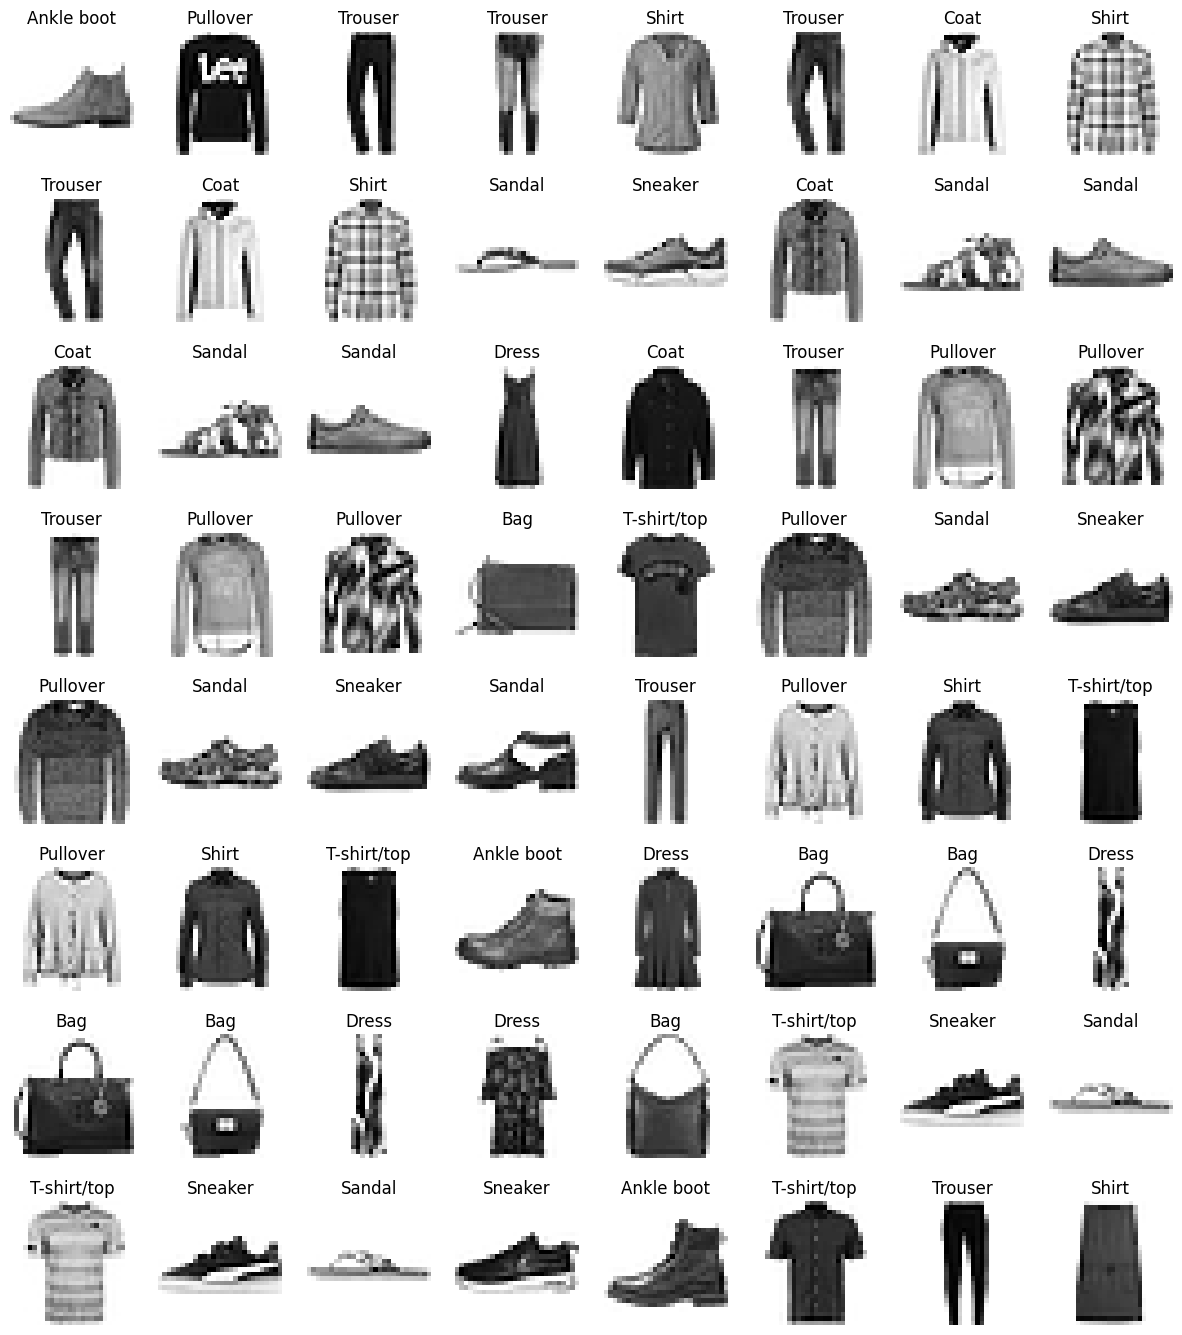

In [17]:
fig, ax = plt.subplots(8, 8, figsize=(15, 17))

for i in range(8):
    for j in range(8):
        image = np.reshape(x_test, (10000, 784))[i*5 + j]
        label = y_pred1[i*5 + j]
        ax[i][j].imshow(image.reshape(28, 28),
                        cmap='binary')
        ax[i][j].set_title(classes[label])
        ax[i][j].axis('off')

plt.show()


In [33]:
import tensorflow as tf

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

modelcn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

modelcn.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

modelcn.fit(x_train, y_train, epochs=30, batch_size=32)


Epoch 1/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4727 - accuracy: 0.8303
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3197 - accuracy: 0.8838
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2735 - accuracy: 0.8993
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2406 - accuracy: 0.9111
Epoch 5/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2146 - accuracy: 0.9198
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1948 - accuracy: 0.9280
Epoch 7/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1781 - accuracy: 0.9339
Epoch 8/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1602 - accuracy: 0.9408
Epoch 9/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1475 - accuracy: 0.9451
Epoch 10/30
1875/1875 [==============================] - 13s 7ms/step - l

In [34]:
# Évaluation des performances du modèle
score1 = modelcn.evaluate(x_test, y_test, verbose=0)
print('Accuracy:', round(score1[1],4))
print('Recall:', round(score1[0],4))

Accuracy: 0.9047
Recall: 0.6093
